In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


In [2]:
dataset = pd.read_csv("MergeInsertion.csv")
dataset.shape

(500, 4)

In [3]:
dataset.head(n=15)

,Size,S,Time,Comparison
0,1000000,0,303878,15804691
1,2000000,0,614261,32667499
2,3000000,0,762903,49959290
3,4000000,0,1223399,67413081
4,5000000,0,1492374,85164381
5,6000000,0,1626836,103017117
6,7000000,0,2304550,120956446
7,8000000,0,2807148,138936848
8,9000000,0,2941282,157133072
9,10000000,0,3071452,175462230


In [4]:
def GenerateGraphFixedS(S_Size):
    x = np.linspace(1000000,10000000,10,dtype=int)
    y = (S_Size * x) + x*np.log(x/S_Size)

    x2 = dataset[dataset["S"] == S_Size]["Size"]
    y2 =  dataset[dataset["S"] == S_Size]["Comparison"]

    x3 = np.linspace(1000000,10000000,10,dtype=int)
    y3 = (x) + x*np.log(x/S_Size)
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')
    plt.plot(x2,y2, 'b')
    plt.plot(x3,y3, 'g')
    # show the plot
    print("S: " + str(S_Size))
    plt.show()

## Fixed S with differing N values

S: 1


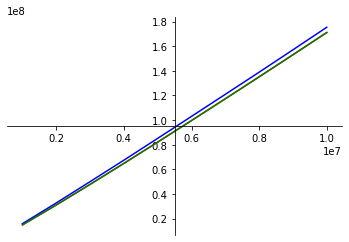

S: 2


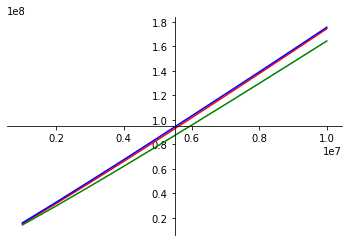

S: 3


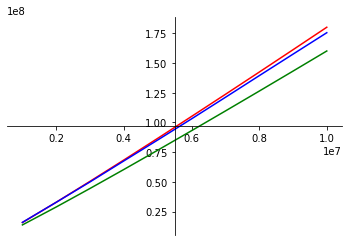

S: 4


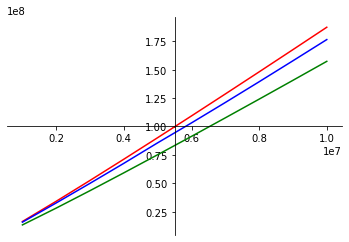

S: 5


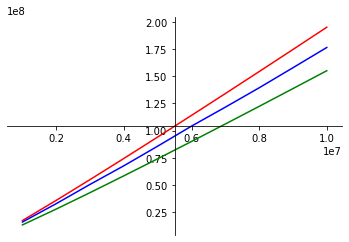

S: 6


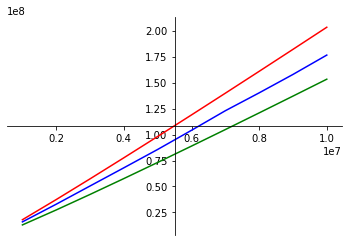

S: 7


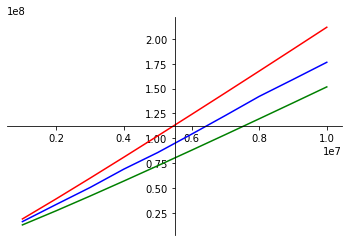

S: 8


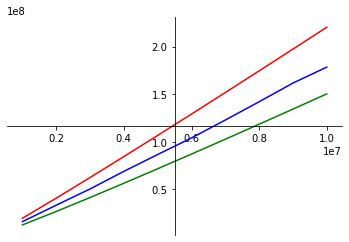

S: 9


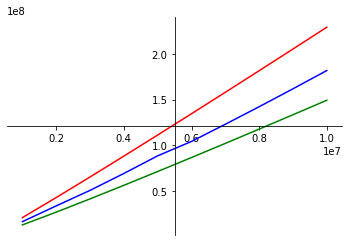

S: 10


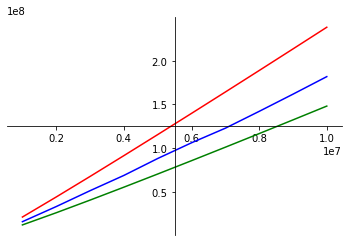

S: 11


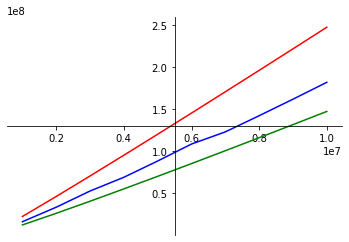

S: 12


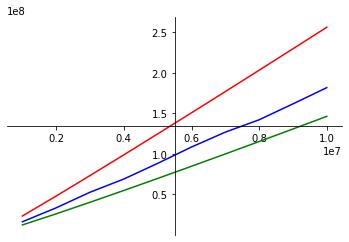

S: 13


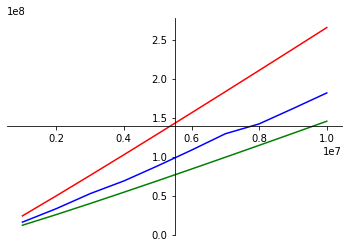

S: 14


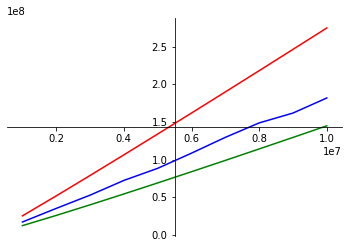

S: 15


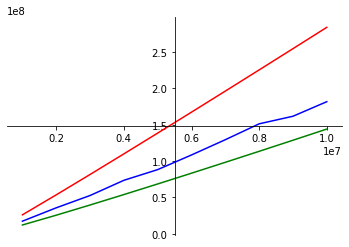

S: 16


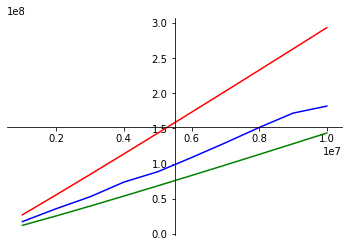

S: 17


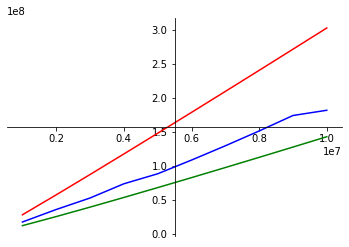

S: 18


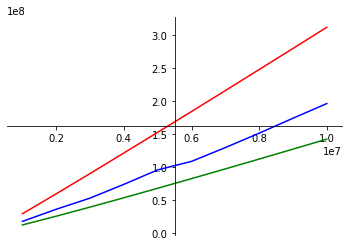

S: 19


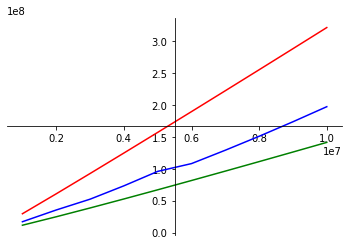

S: 20


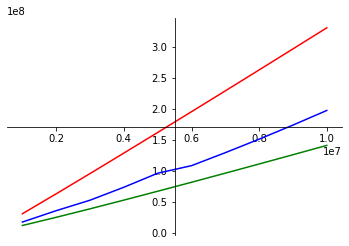

S: 21


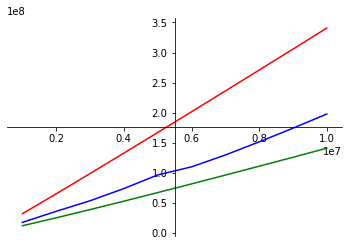

S: 22


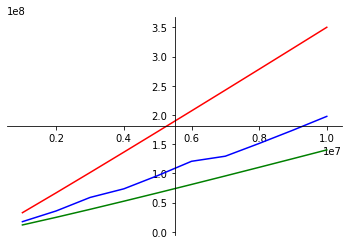

S: 23


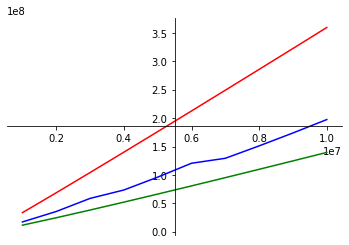

S: 24


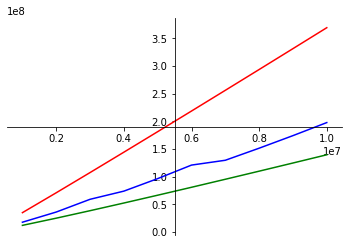

S: 25


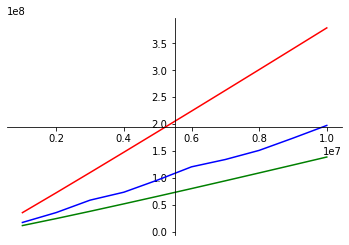

S: 26


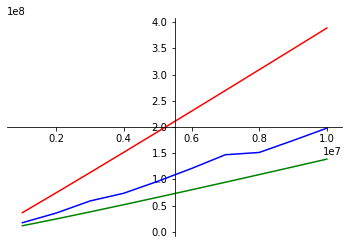

S: 27


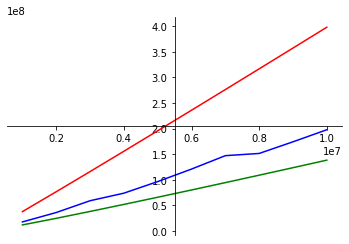

S: 28


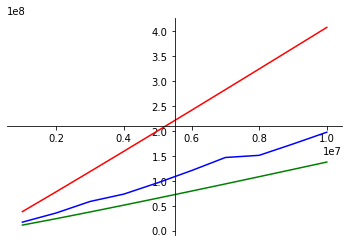

S: 29


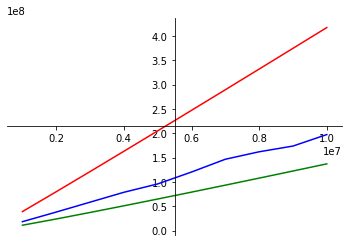

S: 30


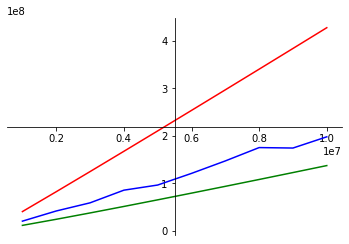

S: 31


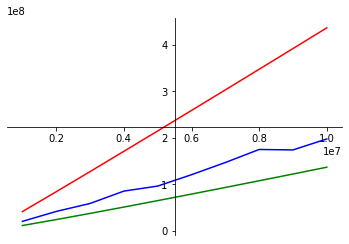

S: 32


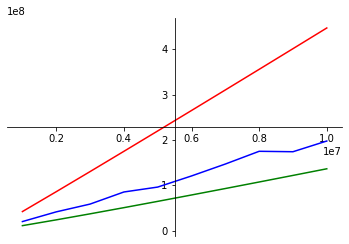

S: 33


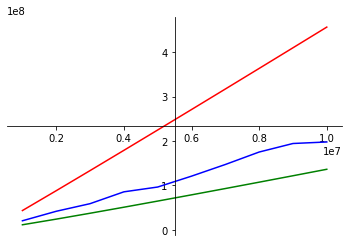

S: 34


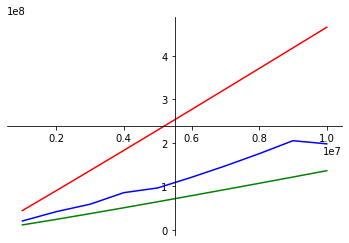

S: 35


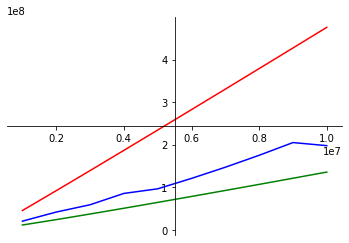

S: 36


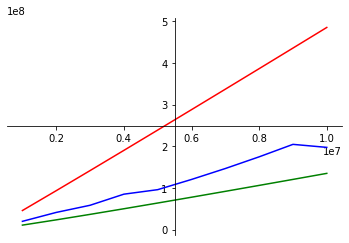

S: 37


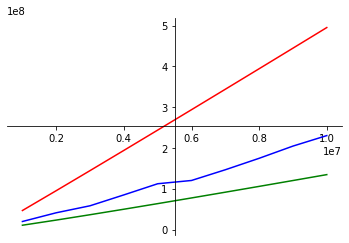

S: 38


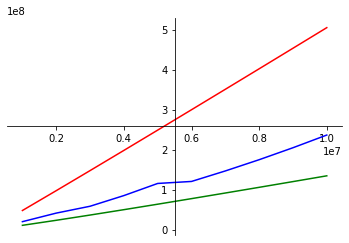

S: 39


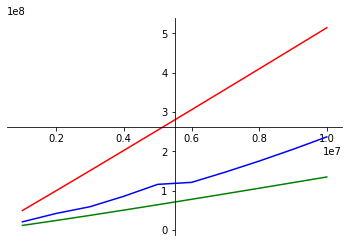

S: 40


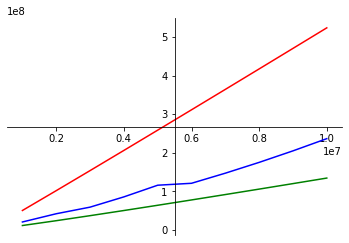

S: 41


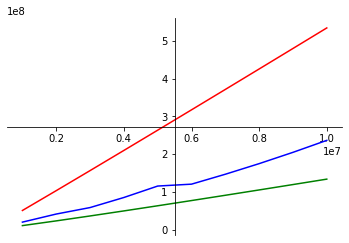

S: 42


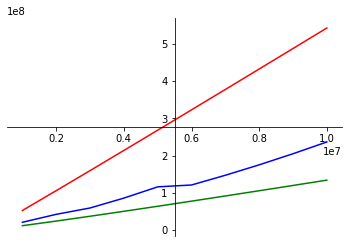

S: 43


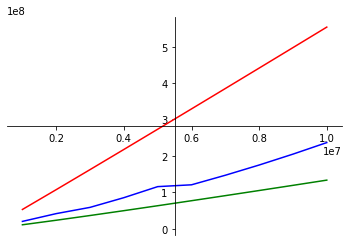

S: 44


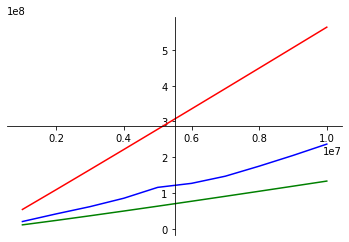

S: 45


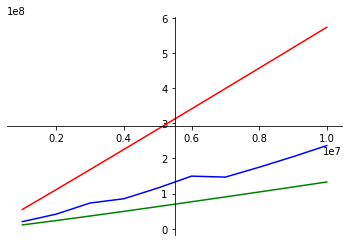

S: 46


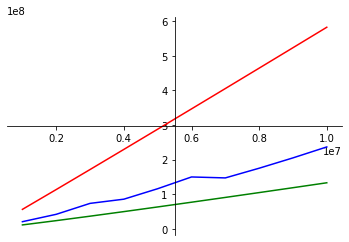

S: 47


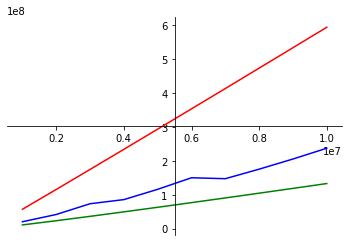

S: 48


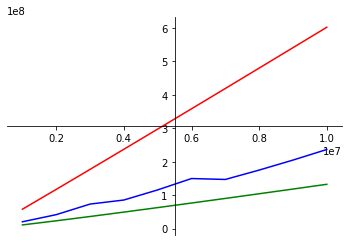

S: 49


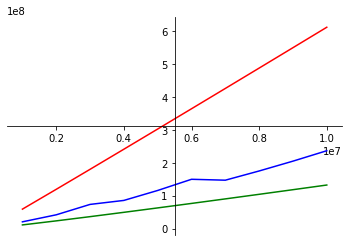

In [5]:
for i in range(1,50):
    GenerateGraphFixedS(i)

In [6]:
def GenerateGraphFixedN(N):
    x = np.linspace(1,49,49,dtype=int)
    y = (N * x) + N*np.log(N/x)

    x2 = dataset[dataset["Size"] == N]["S"]
    y2 =  dataset[dataset["Size"] == N]["Comparison"]

    x3 = np.linspace(1,49,49,dtype=int)
    y3 =  N + N*np.log(N/x)
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')
    plt.plot(x2,y2, 'b')
    plt.plot(x3,y3, 'g')
    # show the plot
    print("N: " + str(N))
    plt.show()

## Fixed N with differing S values

N: 1000000


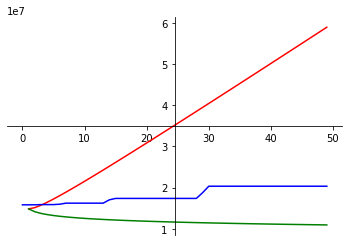

N: 2000000


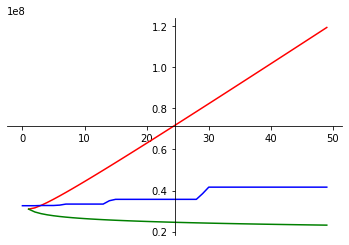

N: 3000000


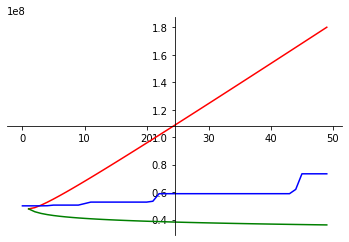

N: 4000000


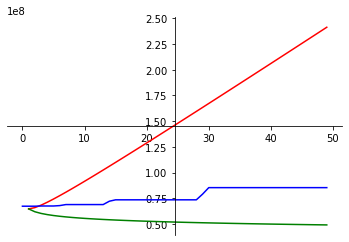

N: 5000000


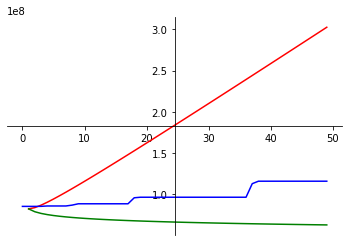

N: 6000000


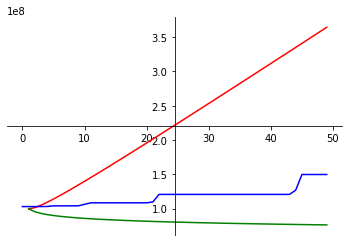

N: 7000000


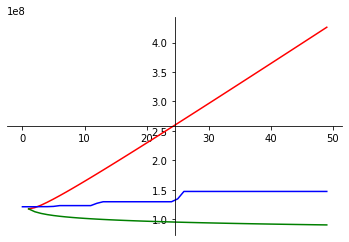

N: 8000000


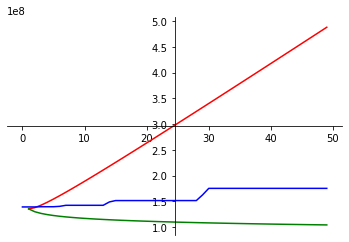

N: 9000000


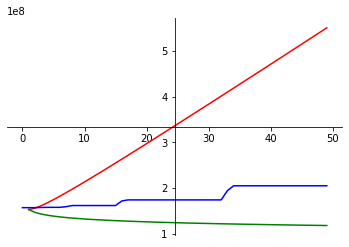

N: 10000000


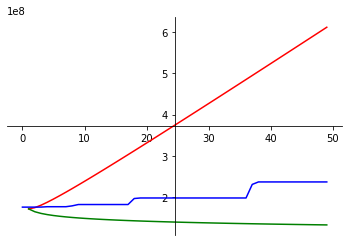

In [7]:
for i in range(1,11):
    GenerateGraphFixedN(1000000 * i)

In [8]:
def sizeAgainstComparison(N,i):
    ComparisonWithS = dataset[dataset["Size"] == N]
    ComparisonWithS = ComparisonWithS.drop(["Size"], axis = 1)
    ComparisonWithS = ComparisonWithS[1:]
    g = sb.scatterplot(x = ComparisonWithS["S"], y = ComparisonWithS["Comparison"], data=ComparisonWithS, ax = axs[i]).set(title= "N: " + str(N))


## Fixed N with differing S values

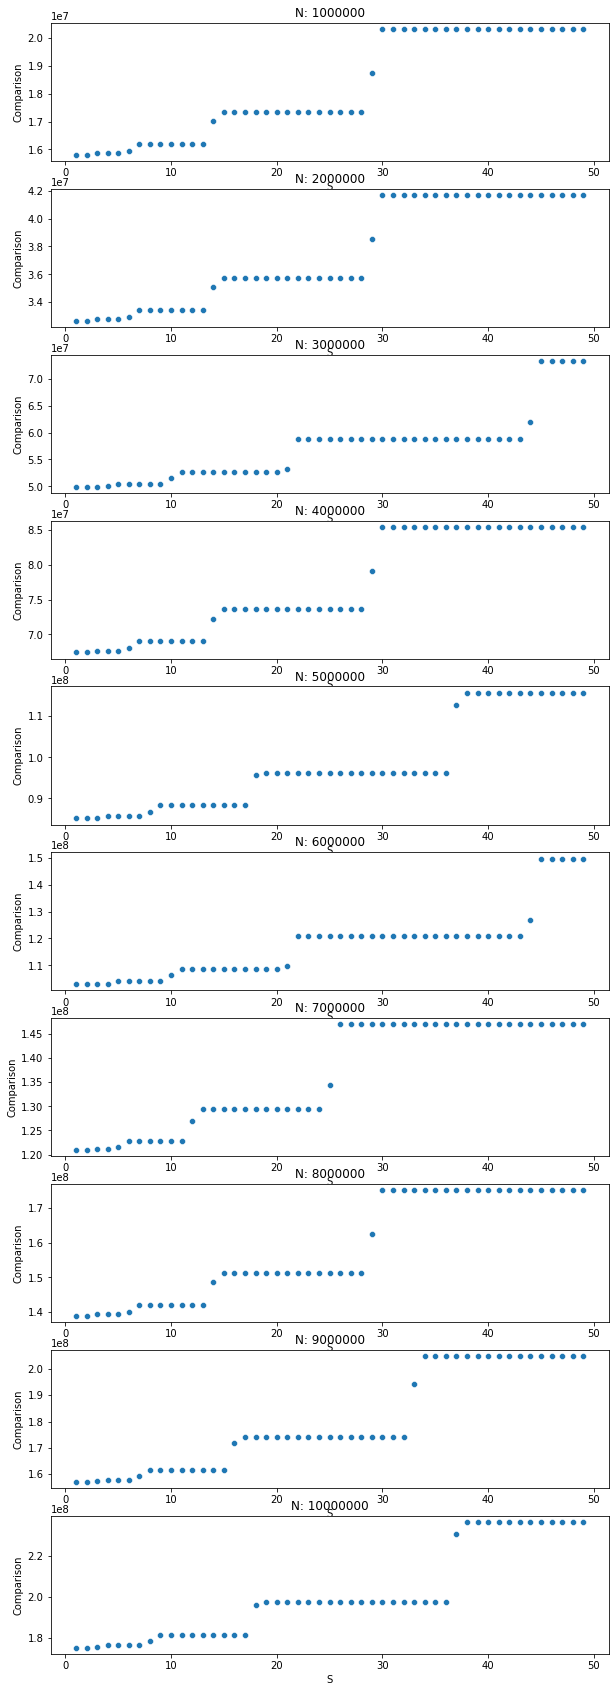

In [9]:
fig, axs = plt.subplots(10, figsize=(10, 30))
for i in range(1,11):
    sizeAgainstComparison(1000000 * i,i -1)

In [10]:
def GenerateGraphFixedS(S_Size):
    x = np.linspace(1000000,10000000,10,dtype=int)
    y = (S_Size * x) + x*np.log(x/S_Size)

    x2 = dataset[dataset["S"] == S_Size]["Size"]
    y2 =  dataset[dataset["S"] == S_Size]["Time"]

    x3 = np.linspace(1000000,10000000,10,dtype=int)
    y3 = (x) + x*np.log(x/S_Size)
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')
    plt.plot(x2,y2, 'b')
    plt.plot(x3,y3, 'g')
    # show the plot
    print("S: " + str(S_Size))
    plt.show()

## Fixed N with differing S values

In [11]:
def TimeAgainstS(N,i):
    x = dataset[dataset["Size"] == N]["S"]
    y =  dataset[dataset["Size"] == N]["Time"]
    g = sb.scatterplot(x = x, y = y, data=dataset, ax = axs[i]).set(title= "N: " + str(N))


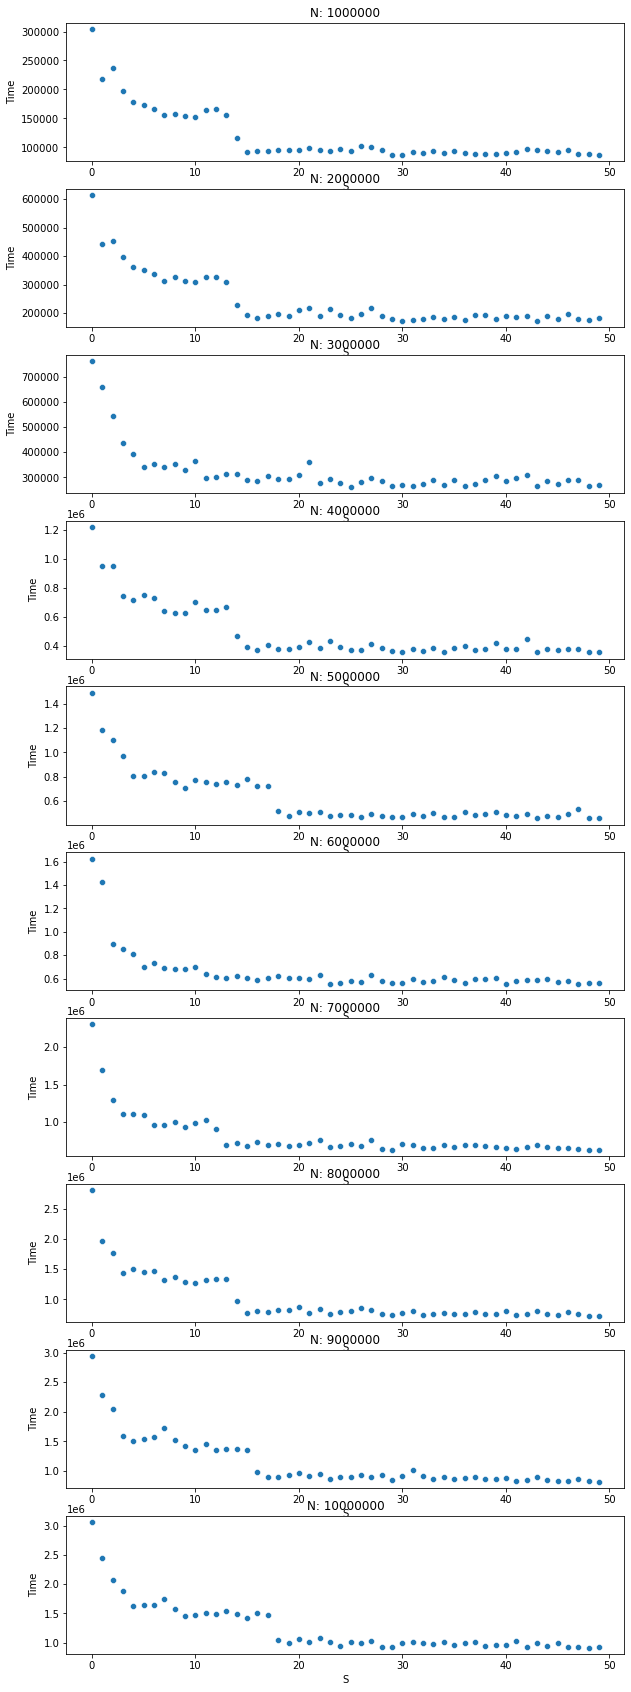

In [12]:
fig, axs = plt.subplots(10, figsize=(10, 30))
for i in range(1,11):
    TimeAgainstS(1000000 * i,i -1)